In [1]:
# load data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)
data, target = housing.data, housing.target
target *= 100 # rescale the target in k$

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [3]:
# compute scores from cross_validate

import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits = 30, test_size = 0.2, random_state = 0)
cv_results = cross_validate(
    regressor,
    data,
    target,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    return_train_score = True,
    n_jobs = 2,
)
cv_results = pd.DataFrame(cv_results)

In [4]:
# negate negative mean absolute error sued to calculate score to get errors

scores = pd.DataFrame()
scores[["train error","test error"]] = -cv_results[["train_score", "test_score"]]

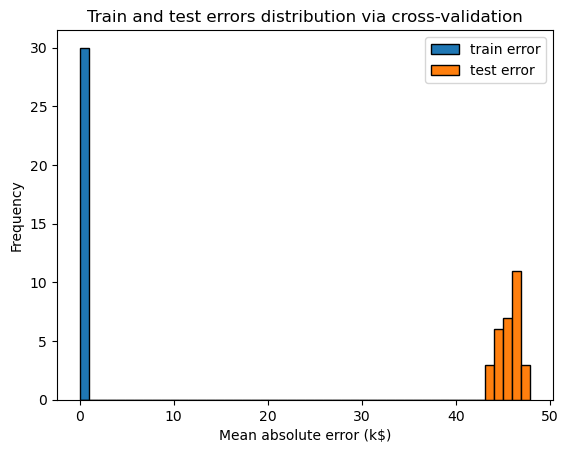

In [5]:
# plot distribution of train and test error

import matplotlib.pyplot as plt

scores.plot.hist(bins = 50, edgecolor = "black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

The low training error tells us that the model is not underfitting as is able to capture the variations in the training set. However, the large testing error indicates that the model is overfitting to the training data and will not make good predictions on the test set.

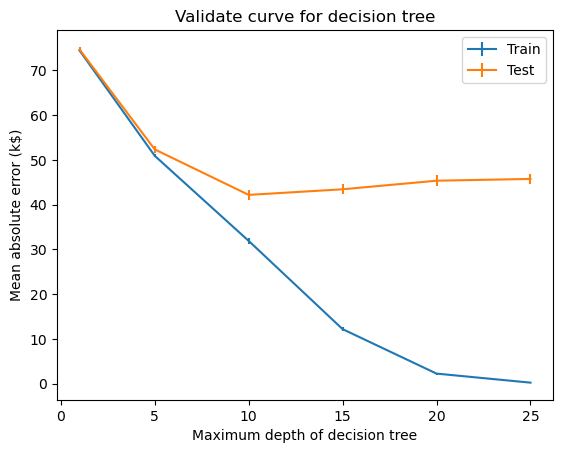

In [9]:
# for a decision tree, the max_depth hyperparameter is used to control the trade-off between under-fitting and over-fitting

import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

max_depth = np.array([1,5,10,15,20,25])
disp = ValidationCurveDisplay.from_estimator(
    regressor,
    data,
    target,
    param_name = "max_depth",
    param_range = max_depth,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    negate_score = True,
    std_display_style = "errorbar",
    n_jobs = 2,
)
_ = disp.ax_.set(
    xlabel = "Maximum depth of decision tree",
    ylabel = "Mean absolute error (k$)",
    title = "Validate curve for decision tree",
)

From this plot, we see that when `max_depth < 10`, the decision tree underfits since both the test and training errors are quite large. Around `max_depth = 10` is when we see the tree generalize best with a lower training error and minimized testing error. After `max_depth > 10` the model definitely overfits as we see the large gap between the training and testing error. There is potential that at `max_depth = 10` the model is overfitting and underfitting since there is a decent gap between the training and testing errors and the training error is still relatively large.